# CGNN Example on the LUCAS (LUng CAncer Simple set) dataset 
## Numerical Dataset with the same structure as LUCAS.

Source : www.causality.inf.ethz.ch/data/LUCAS.html

The true dataset is the **lucas0_train.csv** file ; we use the **NUM_LUCAS.csv** file, representing a graph with continuous data which structure is the same as the true LUCAS dataset.
**Goal** : Find the causal structure of the graph using CGNN, starting from the raw data.

In [1]:
#Import libraries
import cdt
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Hardware parameters
# cdt.SETTINGS.GPU = True
# if cdt.SETTINGS.GPU_LIST == [] and cdt.SETTINGS.GPU:
#     cdt.SETTINGS.GPU_LIST = [0,1]
    
# if cdt.SETTINGS.GPU:
#     cdt.SETTINGS.NB_JOBS = len(cdt.SETTINGS.GPU_LIST)*2
# #Settings for CGNN
# cdt.CGNN_SETTINGS.use_Fast_MMD = False
# cdt.CGNN_SETTINGS.NB_RUNS = 8
# cdt.CGNN_SETTINGS.NB_MAX_RUNS = 16

# #Settings for Feature Selection
# cdt.CGNN_SETTINGS.nb_run_feature_selection = 1
# cdt.CGNN_SETTINGS.regul_param = 0.006
# cdt.CGNN_SETTINGS.threshold_UMG = 0.16
# cdt.SETTINGS.verbose = False

No GPU automatically detected. Setting SETTINGS.GPU to False, SETTINGS.GPU_LIST to [], and SETTINGS.NB_JOBS to cpu_count.


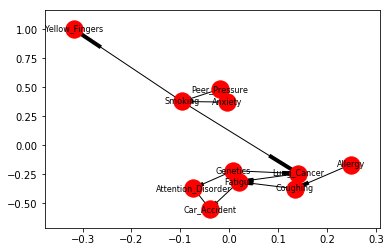

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [2]:
# Load data and graph solution
data = pd.read_csv("NUM_LUCAS.csv")
solution = cdt.utils.read_list_edges("Lucas_graph.csv")  
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
# For a more detailed view of the network, please use the .to_list() function to export the graph to another format  
# importable by other libraries (graphviz, gephi).
data.head()

--- Execution time : 170. seconds ---


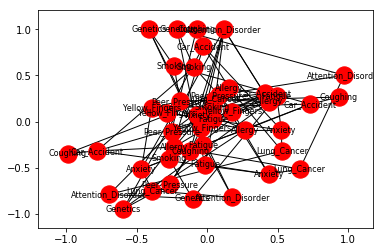

,0,1
0,Anxiety,Car_Accident
1,Anxiety,Attention_Disorder
2,Anxiety,Genetics
3,Anxiety,Lung_Cancer
4,Anxiety,Yellow_Fingers
5,Anxiety,Smoking
6,Allergy,Fatigue
7,Allergy,Attention_Disorder
8,Allergy,Genetics
9,Allergy,Lung_Cancer


In [8]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN
Fsgnn = FSGNN()
start_time = time.time()
ugraph = Fsgnn.predict(data, train_epochs=200, test_epochs=200)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges()))

In [9]:
# Orient the edges of the graph
from cdt.causality.graph import CGNN
Cgnn = CGNN(backend="TensorFlow")
start_time = time.time()
dgraph = Cgnn.predict(data, graph=ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph. 
# Print output results : 
# print(list(dgraph.edges()))
# Data can be generated using the graph output, with the method CGNN_generator_tf from cdt.generators.generators
pd.DataFrame(list(dgraph.edges()), columns=['Cause', 'Effect', 'Score'])

TypeError: __init__() got an unexpected keyword argument 'backend'